Mounted at /content/drive
Found 13612 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


Epoch 1/10
426/426 [==============================] - 1766s 4s/step - loss: 0.4745 - accuracy: 0.7618 - val_loss: 0.6687 - val_accuracy: 0.6226
Epoch 2/10
426/426 [==============================] - 773s 2s/step - loss: 0.3765 - accuracy: 0.8247 - val_loss: 0.5238 - val_accuracy: 0.7311
Epoch 3/10
426/426 [==============================] - 763s 2s/step - loss: 0.3188 - accuracy: 0.8598 - val_loss: 0.3335 - val_accuracy: 0.8632
Epoch 4/10
426/426 [==============================] - 760s 2s/step - loss: 0.2810 - accuracy: 0.8775 - val_loss: 0.2771 - val_accuracy: 0.9481
Epoch 5/10
426/426 [==============================] - 765s 2s/step - loss: 0.2519 - accuracy: 0.8950 - val_loss: 0.2385 - val_accuracy: 0.9245
Epoch 6/10
426/426 [==============================] - 747s 2s/step - loss: 0.2287 - accuracy: 0.9102 - val_loss: 0.3514 - val_accuracy: 0.8491
Epoch 7/10
426/426 [==============================] - 750s 2s/step - loss: 0.2154 - accuracy: 0.9159 - val_loss: 0.2127 - val_accuracy: 0.948

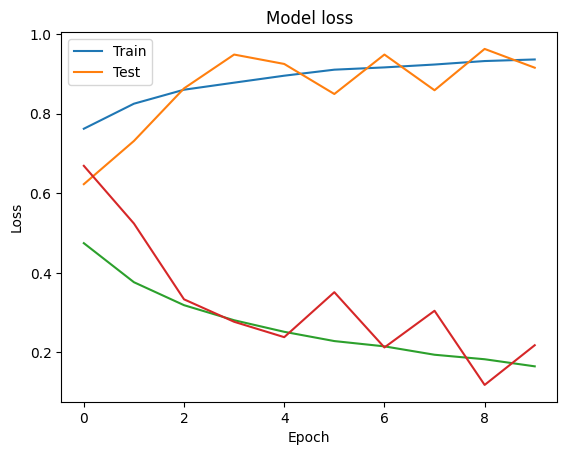

7/7 [==============================] - 3s 435ms/step - loss: 0.2183 - accuracy: 0.9151
Test accuracy: 0.9150943160057068
1/1 [==============================] - 0s 269ms/step
The model predicts that the image is: COVID


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/train'
test_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset/test'
img_path = '/content/drive/MyDrive/COVID-3509.png'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=test_generator)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')


def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale image
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

def interpret_result(prediction):
    if prediction[0][0] > 0.5:
        return "Non-COVID"
    else:
        return "COVID"

prediction = predict_image(model, img_path)
result = interpret_result(prediction)

print(f'The model predicts that the image is: {result}')